In [1]:
from mapnik import *

mapfile = 'mapnik_style.xml'
map_output = 'mymap.png'

m = Map(4*1024,4*1024)
load_map(m, mapfile)
bbox=(Envelope( 10.0,47.5,11.1,48.1 ))

m.zoom_to_box(bbox)
print "Scale = " , m.scale()
render_to_file(m, map_output)

RuntimeError: XML document not well formed:
StartTag: invalid element name at line 14 of 'mapnik_style.xml'

In [2]:
from scipy.misc import imread

In [3]:
img = imread("./265x382.jpg")

<type 'numpy.ndarray'>
303690
(382, 265, 3)


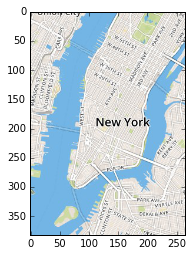

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
%matplotlib inline


#plt.imshow(img, extent=[xmin,xmax,ymin,ymax])
plt.imshow(img)

print type(img)
print img.size
print img.shape
#print img

In [5]:
import pandas
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams 
%matplotlib inline

filelist = glob.glob("C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\*.csv")

#dfList = []
#for item in filelist:
#        result = pandas.read_csv(item)
#        dfList.append(result)

In [ ]:
#df = pandas.read_csv('./data/201502-citibike-tripdata.csv')



In [ ]:
#df = df[df['start station latitude']==df['end station latitude']]
#df = df[df['start station longitude']==df['end station longitude']]

In [9]:
from bokeh import mpl
from bokeh.plotting import output_file, save, show

import matplotlib.colors as pltc

stationDict = {}
stationLatDict = {}
stationLongDict = {}

for file in filelist:
    df = pandas.read_csv(file)

    try:
        df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M:%S')
        except ValueError:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M')
            
    timetitle = df['starttime'][0].strftime('%b %Y')

    df = df[df['start station latitude']==df['end station latitude']]
    df = df[df['start station longitude']==df['end station longitude']]
    for row_index, row in df.iterrows():
        try:
            stid = df.iloc[row_index]['start station id']
        except IndexError:
            continue
        if stid in stationDict.keys():
            stationDict[stid] += 1
        else:
            stationDict[stid] = 1

        stationLatDict[stid] = df.iloc[row_index]['start station latitude']
        stationLongDict[stid] = df.iloc[row_index]['start station longitude']

    sortedRides = []
    sortedLats = []
    sortedLongs = []
    colorBinList = []
    for key in sorted(stationDict):
        sortedRides.append(float(stationDict[key]))
        sortedLats.append(float(stationLatDict[key]))
        sortedLongs.append(float(stationLongDict[key]))
                            
    xmin = -74.04
    xmax = -73.95
    ymin = 40.68
    ymax = 40.78

    fig, ax = plt.subplots()
    #my_mpl = plt.figure()
    rcParams['figure.figsize'] = (16, 8) #Size of figure  
    plt.scatter(sortedLongs, sortedLats, c=sortedRides, norm = pltc.SymLogNorm(1.0), s=50, zorder=1)
    plt.gray()
    plt.title(timetitle)
    plt.ylabel('station latitude')
    plt.xlabel('station longitude')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.imshow(img, zorder=0, extent=[xmin,xmax,ymin,ymax])
#my_mpl.savefig("test.jpg")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #p = figure()
#rcParams['figure.figsize'] = (16, 8) #Size of figure
    #p.image_rgba(image=[img], x=[0], y=[0],dw=[100], dh=[100])
#p.scatter(sortedLongs, sortedLats)
#p.gray()
#p.ylabel('station latitude')
#p.xlabel('station longitude')
#p.xlim([xmin,xmax])
#p.ylim([ymin,ymax])
#p.imshow(img, zorder=0, extent=[xmin,xmax,ymin,ymax])
    fig.savefig(file+".jpg")
    fig.clear()
#my_bokeh = mpl.to_bokeh(my_mpl)
    #output_file(file+".html")
    #save(p)

KeyError: 'starttime'

[(-73.976341509999997, 40.765909360000002, -73.976341509999997, 40.765909360000002), (-73.973714650000005, 40.764397100000004, -73.973714650000005, 40.764397100000004), (-73.981918410000006, 40.769155050000002, -73.981918410000006, 40.769155050000002), (-74.004607300000004, 40.71273266, -74.004607300000004, 40.71273266), (-74.016583539999999, 40.715337899999994, -74.016583539999999, 40.715337899999994), (-74.01713445, 40.708346980000002, -74.016583539999999, 40.715337899999994), (-74.013220689999997, 40.71754834, -74.013220689999997, 40.71754834), (-74.01713445, 40.708346980000002, -74.01713445, 40.708346980000002), (-73.981693329999999, 40.766953170000001, -73.981693329999999, 40.766953170000001), (-73.973714650000005, 40.764397100000004, -73.976341509999997, 40.765909360000002)]
[2099, 909, 643, 503, 447, 422, 421, 388, 354, 337]
[(-73.976341509999997, 40.765909360000002, -73.976341509999997, 40.765909360000002), (-73.973714650000005, 40.764397100000004, -73.973714650000005, 40.76439

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__'


[3958, 1768, 1279, 1131, 952, 862, 834, 822, 774, 695]


 ignored


KeyboardInterrupt: 

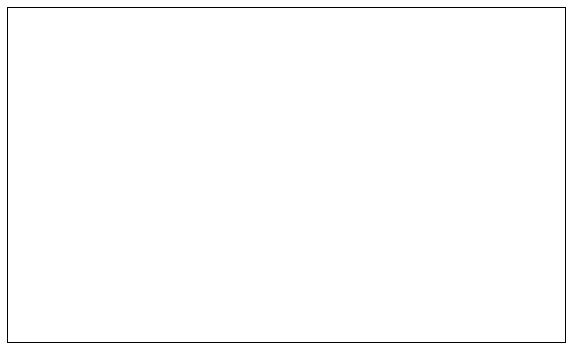

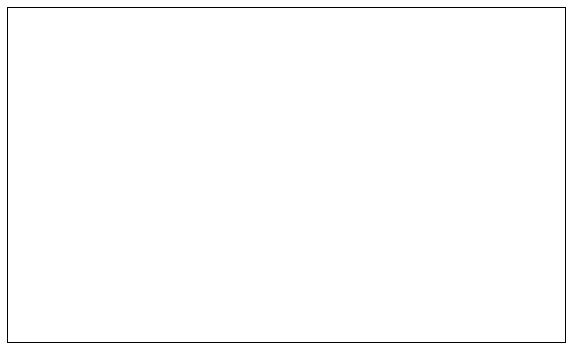

In [10]:
from collections import OrderedDict

paths = {}

#cantors pairing function
for file in filelist:
    df = pandas.read_csv(file)
    
    try:
        df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M:%S')
        except ValueError:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M')
    
    
    for row_index, row in df.iterrows():
    #for row_index in xrange(0,200):
        try:
            startid = df.iloc[row_index]['start station id']
            endid = df.iloc[row_index]['end station id']
            startlat = df.iloc[row_index]['start station latitude']
            startlon = df.iloc[row_index]['start station longitude']
            endlat = df.iloc[row_index]['end station latitude']
            endlon = df.iloc[row_index]['end station longitude']
            timetitle = df.iloc[row_index]['starttime'].strftime('%b %Y')
        except IndexError:
            break
        #uniqueid = 0.5*(startid + endid)*(startid + endid + 1.) + endid
        uniqueid = (startlon, startlat, endlon, endlat)
        #uniqueid = str(startid)+','+str(endid)
        try:
            paths[uniqueid] += 1
        except KeyError:
            paths[uniqueid] = 1
            
    d_sorted_by_value = OrderedDict(sorted(paths.items(), key=lambda x: x[1], reverse=True))

    keylist = list(d_sorted_by_value)[:10]
    valuelist = list(d_sorted_by_value.values())[:10]
    
    fig, ax = plt.subplots(figsize=(10,6))
    fig = plt.figure()
    rcParams['figure.figsize'] = (16, 8) #Size of figure  

    colorlist = xrange(1,11)

    startlon = []
    startlat = []
    endlon = []
    endlat = []

    print keylist
    print valuelist

    for key in keylist:
        startlon.append(key[0])
        startlat.append(key[1])
        endlon.append(key[2])
        endlat.append(key[3])
    
                            
    xmin = -74.04
    xmax = -73.95
    ymin = 40.68
    ymax = 40.78

    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])

#print startlon
#print startlat
#print endlon
#print endlat
    plt.scatter(startlon, startlat, c=colorlist, s=60, zorder=1)
    plt.scatter(endlon, endlat, c=colorlist, s=60, zorder=1)
    plt.imshow(img, zorder=0, extent=[xmin,xmax,ymin,ymax])
    #legend = ax.legend(loc='upper left', shadow=True)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(timetitle)
    
    fig.savefig(file+'mostUsedPaths.jpg')
    fig.clear()
#p.show()
        
#d_sorted_by_value = OrderedDict(sorted(paths.items(), key=lambda x: x[1]))

#list(d_sorted_by_value)[:-5]
#list(d_sorted_by_value.values())[:-5]
#print paths
        #p = plt.figure()
#plt.bar(paths.keys(), paths.values(), color='b', align='center')

#p.savefig('test.jpg')
#p.show()

In [ ]:
from collections import OrderedDict
from datetime import datetime

paths = {}

#cantors pairing function
for file in filelist:
    df = pandas.read_csv(file)
    try:
        df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M:%S')
        except ValueError:
            df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M')
    df['starthour'] = df['starttime'].apply(lambda x: x.hour)
    df['startday'] = df['starttime'].apply(lambda x: x.weekday())
    #df_times_weekday = df[df['startday']<5]['starthour'].value_counts()/5.
    #df_times_weekend = df[df['startday']>4]['starthour'].value_counts()/2.
    # normalize roughly per day
    df_times_weekday = df[df['startday']<5]['starthour'].value_counts()/21.
    df_times_weekend = df[df['startday']>4]['starthour'].value_counts()/9.
    timetitle = df['starttime'][0].strftime('%b %Y')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df_times_weekday.index.values, df_times_weekday.values, 'o', color='r', label='weekday')
    ax.plot(df_times_weekend.index.values, df_times_weekend.values, 's', color='b', label='weekend')
    legend = ax.legend(loc='upper left', shadow=True)
    plt.ylabel('number of rides per day')
    plt.xlabel('start hour')
    plt.title(timetitle)
    ax.set_ylim([0,5000])
    fig.savefig(file+'hourlyCounts.jpg')
    fig.clear()

#show()